# Sharpe Ratio Optimization

* Sharpe Ratio 1 good
* Sharpe Ratio of 2 is very good
* Sharpe Ratio of 3 or higher is excellent
* How can we optimize the portfolio holdings?

We could just guess and check a bunch of random allocatino and see which one has the best sharpe ratiio.

This allows us to calculate the sharpe ratio for thousands of randomly selected allocatinos.

We can then plot the allocationo on a chart showing return vs volatility, colored by the sharpe ratio.

We can create an minimization, for our optimizatin algorthm

y = x ^ 2

y = (2 - x) ^2 ---> x = 2

The idea of a minimizer will allow us to build an optimizer.
SciPy can do the heavy math for us!

Maximize the sharpe ratio meaning we can create an optimzer that will atttempt to minizme the negative sharpe ratio.

inverse the sharpe ratio and optimize it.

Efficient frontier - Markowitz Modern Portfolio Theory is the top left curve to the sharpe ratio 

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [162]:
tickers = ['TLRY','BYND','SPCE','SHOP','SNAP','AAPL','AMZN']
pf_data = pd.DataFrame()

In [163]:
for stock in tickers:
    pf_data[stock] = web.DataReader(stock,data_source='yahoo',start='2019-05-01')['Adj Close']

In [164]:
pf_data.head()

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
Date,,,,,,,
2019-05-01,51.950001,NaN,10.27,245.160004,11.20,207.239120,1911.520020
2019-05-02,50.230000,65.750000,10.32,255.539993,11.24,205.890457,1900.819946
2019-05-03,50.220001,66.790001,10.31,264.029999,11.80,208.449951,1962.459961
2019-05-06,49.790001,74.790001,10.33,265.519989,11.77,205.230911,1950.550049
2019-05-07,47.220001,79.169998,10.34,258.690002,11.17,199.698502,1921.000000


In [165]:
pf_data.tail()

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
Date,,,,,,,
2020-05-19,8.16,136.199997,15.870000,753.010010,17.480000,313.140015,2449.330078
2020-05-20,8.05,140.500000,14.860000,778.000000,18.230000,319.230011,2497.939941
2020-05-21,9.65,138.110001,14.710000,802.349976,17.549999,316.850006,2446.739990
2020-05-22,10.26,136.800003,15.740000,825.169983,17.670000,318.890015,2436.879883
2020-05-26,11.12,134.839996,16.315001,788.324280,17.639999,319.439789,2436.729980


In [166]:
pf_data.pct_change(1).mean()

TLRY   -0.002594
BYND    0.004721
SPCE    0.003275
SHOP    0.005123
SNAP    0.002609
AAPL    0.001923
AMZN    0.001093
dtype: float64

In [167]:
# Pearson correlation coefficient
# how correlated is each stock
# use for pairs trading
pf_data.pct_change(1).corr()

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
TLRY,1.000000,0.223906,0.272003,0.237862,0.334705,0.235511,0.229776
BYND,0.223906,1.000000,0.217740,0.305702,0.213893,0.259453,0.252204
SPCE,0.272003,0.217740,1.000000,0.426207,0.303210,0.406635,0.307888
SHOP,0.237862,0.305702,0.426207,1.000000,0.401514,0.560769,0.564009
SNAP,0.334705,0.213893,0.303210,0.401514,1.000000,0.454285,0.396184
AAPL,0.235511,0.259453,0.406635,0.560769,0.454285,1.000000,0.681959
AMZN,0.229776,0.252204,0.307888,0.564009,0.396184,0.681959,1.000000


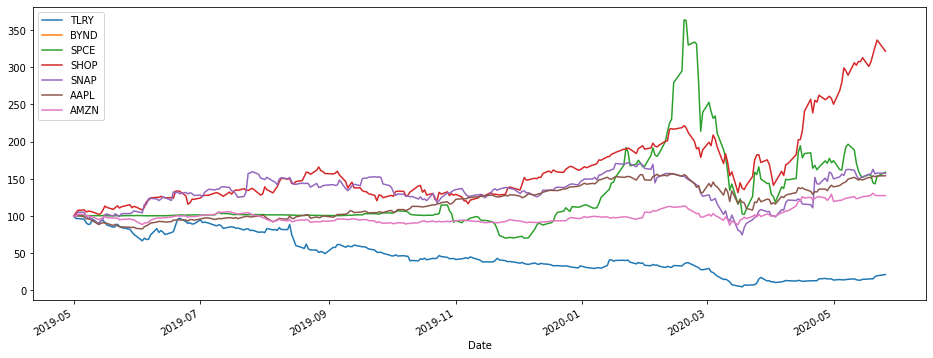

In [168]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(16,6));

In [169]:
# Move from arthimatic to logarithmic
# to detrend or normalize 
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns.head()

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
Date,,,,,,,
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-02,-0.033669,NaN,0.004857,0.041468,0.003565,-0.006529,-0.005613
2019-05-03,-0.000199,0.015694,-0.000969,0.032684,0.048621,0.012355,0.031913
2019-05-06,-0.008599,0.113131,0.001938,0.005627,-0.002546,-0.015563,-0.006087
2019-05-07,-0.052997,0.056913,0.000968,-0.026060,-0.052322,-0.027327,-0.015266


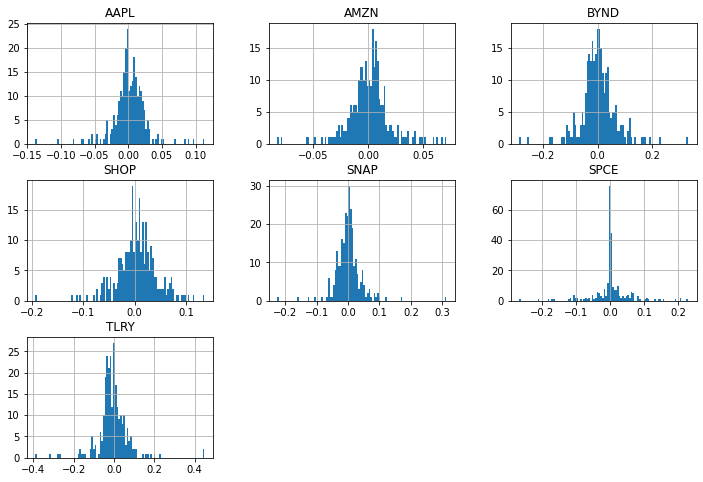

In [170]:
log_returns.hist(bins=100,figsize=(12,8));

In [171]:
# Annualized returns
log_returns.mean() *252

TLRY   -1.444116
BYND    0.675350
SPCE    0.433607
SHOP    1.094184
SNAP    0.425548
AAPL    0.405350
AMZN    0.227417
dtype: float64

In [172]:
log_returns.mean()

TLRY   -0.005731
BYND    0.002680
SPCE    0.001721
SHOP    0.004342
SNAP    0.001689
AAPL    0.001609
AMZN    0.000902
dtype: float64

In [173]:
log_returns.cov()

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
TLRY,0.006152,0.001214,0.001313,0.000838,0.001187,0.000498,0.000358
BYND,0.001214,0.004047,0.000796,0.000790,0.000638,0.000426,0.000320
SPCE,0.001313,0.000796,0.003111,0.000953,0.000795,0.000586,0.000347
SHOP,0.000838,0.000790,0.000953,0.001550,0.000717,0.000564,0.000438
SNAP,0.001187,0.000638,0.000795,0.000717,0.001811,0.000511,0.000344
AAPL,0.000498,0.000426,0.000586,0.000564,0.000511,0.000630,0.000336
AMZN,0.000358,0.000320,0.000347,0.000438,0.000344,0.000336,0.000382


In [174]:
log_returns.cov() * 252

,TLRY,BYND,SPCE,SHOP,SNAP,AAPL,AMZN
TLRY,1.550424,0.305977,0.330825,0.211108,0.299168,0.125370,0.090107
BYND,0.305977,1.019750,0.200480,0.199069,0.160686,0.107414,0.080556
SPCE,0.330825,0.200480,0.784056,0.240051,0.200441,0.147680,0.087447
SHOP,0.211108,0.199069,0.240051,0.390484,0.180702,0.142236,0.110419
SNAP,0.299168,0.160686,0.200441,0.180702,0.456338,0.128890,0.086762
AAPL,0.125370,0.107414,0.147680,0.142236,0.128890,0.158665,0.084688
AMZN,0.090107,0.080556,0.087447,0.110419,0.086762,0.084688,0.096247


In [175]:
print(pf_data.columns)
np.random.seed(101)

weights = np.array(np.random.random(len(tickers)))
print("Random weights")
print(weights)

# this is a normalization technique
print('rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['TLRY', 'BYND', 'SPCE', 'SHOP', 'SNAP', 'AAPL', 'AMZN'], dtype='object')
Random weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622]
rebalance
[0.16587379 0.18330566 0.00914628 0.05509493 0.22011965 0.26785824
 0.09860144]


In [176]:
#Expected return
print("Expected Portfolio Return")
expected_return = np.sum(log_returns.mean() * weights * 252)
expected_return

Expected Portfolio Return


0.1731758454812246

In [177]:
# Expected Volatility or Variance
# Using clever linear algebra to run faster
print("Expected Volatility")
expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252,weights)))
expected_vol

Expected Volatility


0.4881373320974512

In [178]:
# Sharpe Ratio
print("Sharpe Ratio")
SR = expected_return / expected_vol
SR

Sharpe Ratio


0.3547686974424074

In [197]:
# Now lets do all of this but thousands of times over

number_of_portfolios = 100000
all_weights = np.zeros((number_of_portfolios,len(tickers)))
returns_array = np.zeros(number_of_portfolios)
vol_array = np.zeros(number_of_portfolios)
sharpe_array = np.zeros(number_of_portfolios)

for index in range(number_of_portfolios):
    weights = np.array(np.random.random(len(tickers)))
    weights = weights/np.sum(weights)
    
    all_weights[index,:] = weights
    
    returns_array[index] = np.sum(log_returns.mean() * weights * 252)
    vol_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252,weights)))
    
    sharpe_array[index] =  returns_array[index] / vol_array[index]

In [198]:
sharpe_array.max()

1.599664703992717

In [199]:
# Find index location
sharpe_array.argmax()

39237

In [200]:
# show optimal allocations
all_weights[1420,:]

array([0.01677443, 0.28800815, 0.03854383, 0.06120712, 0.22103267,
       0.10297181, 0.27146199])

In [201]:
max_sr_returns = returns_array[sharpe_array.argmax()]
max_sr_vol = vol_array[sharpe_array.argmax()]

In [202]:
max_sr_returns

0.8042489482222156

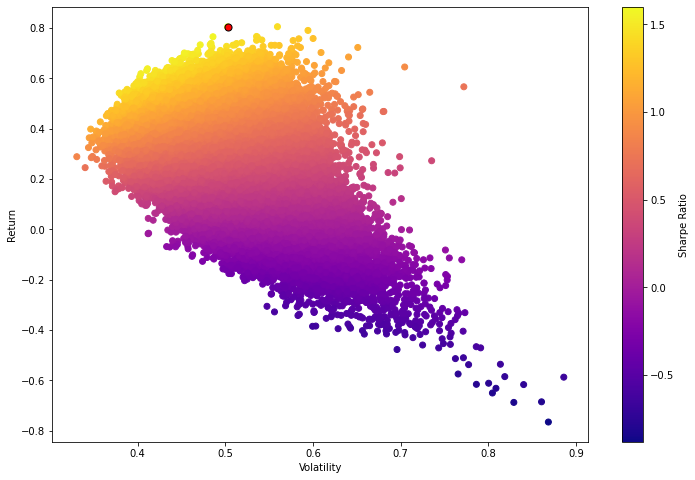

In [203]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,returns_array,c=sharpe_array, cmap='plasma');
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_returns,c='red',s=50,edgecolors='black');

In [204]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights * 252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [205]:
from scipy.optimize import minimize
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [206]:

# given a weight allocation then return the sharpe ratio
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 

In [207]:
def check_sum(weights):
    return np.sum(weights) - 1

In [208]:
# equation type constraint
cons = ({'type':'eq','fun':check_sum})

In [209]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [210]:
init_guess = [0.1428571429,0.1428571429,0.1428571429,0.1428571429,0.1428571429,0.14285,0.14285]

In [211]:
# Sequential Least Squares Algorithm
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP',bounds=bounds, constraints=cons)
opt_results

     fun: -1.7553156006833817
     jac: array([ 3.37952514e+00,  1.47773325e-03,  4.10026476e-01, -6.59376383e-05,
        1.48764268e-01, -5.09887934e-04,  1.40833303e-01])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.00000000e+00, 4.45912264e-02, 1.19824997e-15, 9.48861754e-01,
       1.88299139e-15, 6.54701996e-03, 2.15406687e-15])

In [212]:
# Jacobian
opt_results.jac

array([ 3.37952514e+00,  1.47773325e-03,  4.10026476e-01, -6.59376383e-05,
        1.48764268e-01, -5.09887934e-04,  1.40833303e-01])

In [213]:
opt_results.x

array([0.00000000e+00, 4.45912264e-02, 1.19824997e-15, 9.48861754e-01,
       1.88299139e-15, 6.54701996e-03, 2.15406687e-15])

In [214]:
get_ret_vol_sr(opt_results.x)

array([1.07099827, 0.6101457 , 1.7553156 ])

In [226]:
# Efficient frontier
# The lowest risk possible for a given return
fronter_y = np.linspace(0,0.3,1000)
fronter_y

array([0.        , 0.0003003 , 0.0006006 , 0.0009009 , 0.0012012 ,
       0.0015015 , 0.0018018 , 0.0021021 , 0.0024024 , 0.0027027 ,
       0.003003  , 0.0033033 , 0.0036036 , 0.0039039 , 0.0042042 ,
       0.0045045 , 0.0048048 , 0.00510511, 0.00540541, 0.00570571,
       0.00600601, 0.00630631, 0.00660661, 0.00690691, 0.00720721,
       0.00750751, 0.00780781, 0.00810811, 0.00840841, 0.00870871,
       0.00900901, 0.00930931, 0.00960961, 0.00990991, 0.01021021,
       0.01051051, 0.01081081, 0.01111111, 0.01141141, 0.01171171,
       0.01201201, 0.01231231, 0.01261261, 0.01291291, 0.01321321,
       0.01351351, 0.01381381, 0.01411411, 0.01441441, 0.01471471,
       0.01501502, 0.01531532, 0.01561562, 0.01591592, 0.01621622,
       0.01651652, 0.01681682, 0.01711712, 0.01741742, 0.01771772,
       0.01801802, 0.01831832, 0.01861862, 0.01891892, 0.01921922,
       0.01951952, 0.01981982, 0.02012012, 0.02042042, 0.02072072,
       0.02102102, 0.02132132, 0.02162162, 0.02192192, 0.02222

In [227]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [228]:
frontier_vol = []

for possible_return in fronter_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, init_guess,method='SLSQP',
                     bounds=bounds,
                     constraints=cons)
    
    frontier_vol.append(result['fun'])

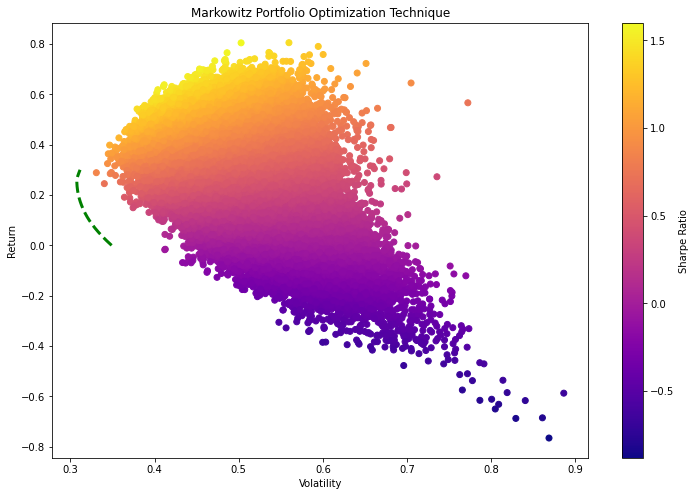

In [229]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,returns_array,c=sharpe_array, cmap='plasma');
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Markowitz Portfolio Optimization Technique')

plt.plot(frontier_vol,fronter_y,'g--',linewidth=3);